In [5]:
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt

# Convolutional Neural Networks for image recognition

Mostly due to [TensorFlow docs](https://github.com/tensorflow/docs/blob/master/site/en/r2/tutorials/images/intro_to_cnns.ipynb). Thanks Google.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
train_images.shape

(60000, 28, 28, 1)

The dimensions are: (image,height,width,channel).

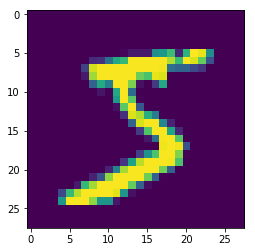

In [11]:
plt.imshow( train_images[0,:,:,0] )

Add a bunch of convolution layers.

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Flatten the final convolution matrix, pass it through 64 "logistic regression" neurons, and then finally to a softmax layer for multi-class probabilistic regression.

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 42s 697us/sample - loss: 0.1447 - accuracy: 0.9548
Epoch 2/5
60000/60000 [==============================] - 42s 696us/sample - loss: 0.0445 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 41s 685us/sample - loss: 0.0312 - accuracy: 0.9903
Epoch 4/5
60000/60000 [==============================] - 41s 688us/sample - loss: 0.0242 - accuracy: 0.9924
Epoch 5/5
60000/60000 [==============================] - 42s 693us/sample - loss: 0.0188 - accuracy: 0.9939


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 323us/sample - loss: 0.0267 - accuracy: 0.9915


## Prediction on a single image

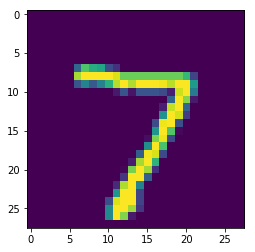

In [36]:
plt.imshow( test_images[0:1].reshape(28,28) )

In [37]:
model.predict( test_images[0:1] )[0].round(4)

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.9999,
       0.    , 0.    ], dtype=float32)